# 1. Extract Data

In [1]:
import os
print(os.getcwd())
print(os.listdir(path="..\\"))

c:\Users\KIIT\Desktop\GitHUB\Coding\DL\ANN
['.gitkeep', 'ANN', 'Employee_attrition.csv', 'Housing.csv', 'Income&Expenditure.csv']


In [2]:
import pandas as pd
data=pd.read_csv("..\\Income&Expenditure.csv").iloc[:,2:]
data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
265,256,01-02-2024,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
266,257,02-02-2024,Friday,None,0.0,None,None,27700.0,160080.37,339000.58
267,258,03-02-2024,Saturday,Expenditure,8000.0,NaN,Cash,19700.0,152080.37,331000.58


In [3]:
Date_data=data["Date"]

In [4]:
data.set_index(data["Date"],inplace=True)
data.drop(columns="Date",inplace=True)
data

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
01-08-2023,2,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
02-08-2023,3,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
03-08-2023,4,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
04-08-2023,5,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
01-02-2024,256,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
02-02-2024,257,Friday,None,0.0,None,None,27700.0,160080.37,339000.58


# 2 EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 31-07-2023 to 04-02-2024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Day                269 non-null    object 
 2   IncExp Status      269 non-null    object 
 3   Rupees             269 non-null    float64
 4   Pupose of IncExp   267 non-null    object 
 5   Payment mode       269 non-null    object 
 6   Monthly Saving     269 non-null    float64
 7   Cumulative Saving  269 non-null    float64
 8   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 21.0+ KB


In [6]:
data.isnull().sum()

Serial Number        0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [7]:
data["Pupose of IncExp"].fillna("None",inplace=True)
data.isnull().sum()

Serial Number        0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     0
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

# 3. Feature Extraction

In [8]:
obj_col=data.columns[data.dtypes=="object"]
obj_col

Index(['Day', 'IncExp Status', 'Pupose of IncExp', 'Payment mode'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
for i in obj_col:
    if i!="Date":
        f(i)
data

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,1,1,27700.0,29,2,27700.0,27700.00,206620.21
01-08-2023,2,5,0,720.9,22,2,26979.1,26979.10,205899.31
02-08-2023,3,6,2,0.0,28,1,26979.1,26979.10,205899.31
03-08-2023,4,4,2,0.0,28,1,26979.1,26979.10,205899.31
04-08-2023,5,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,6,1,27700.0,29,2,27700.0,160080.37,339000.58
01-02-2024,256,4,2,0.0,28,1,27700.0,160080.37,339000.58
02-02-2024,257,0,2,0.0,28,1,27700.0,160080.37,339000.58


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 31-07-2023 to 04-02-2024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Day                269 non-null    int32  
 2   IncExp Status      269 non-null    int32  
 3   Rupees             269 non-null    float64
 4   Pupose of IncExp   269 non-null    int32  
 5   Payment mode       269 non-null    int32  
 6   Monthly Saving     269 non-null    float64
 7   Cumulative Saving  269 non-null    float64
 8   Total Balance      269 non-null    float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 16.8+ KB


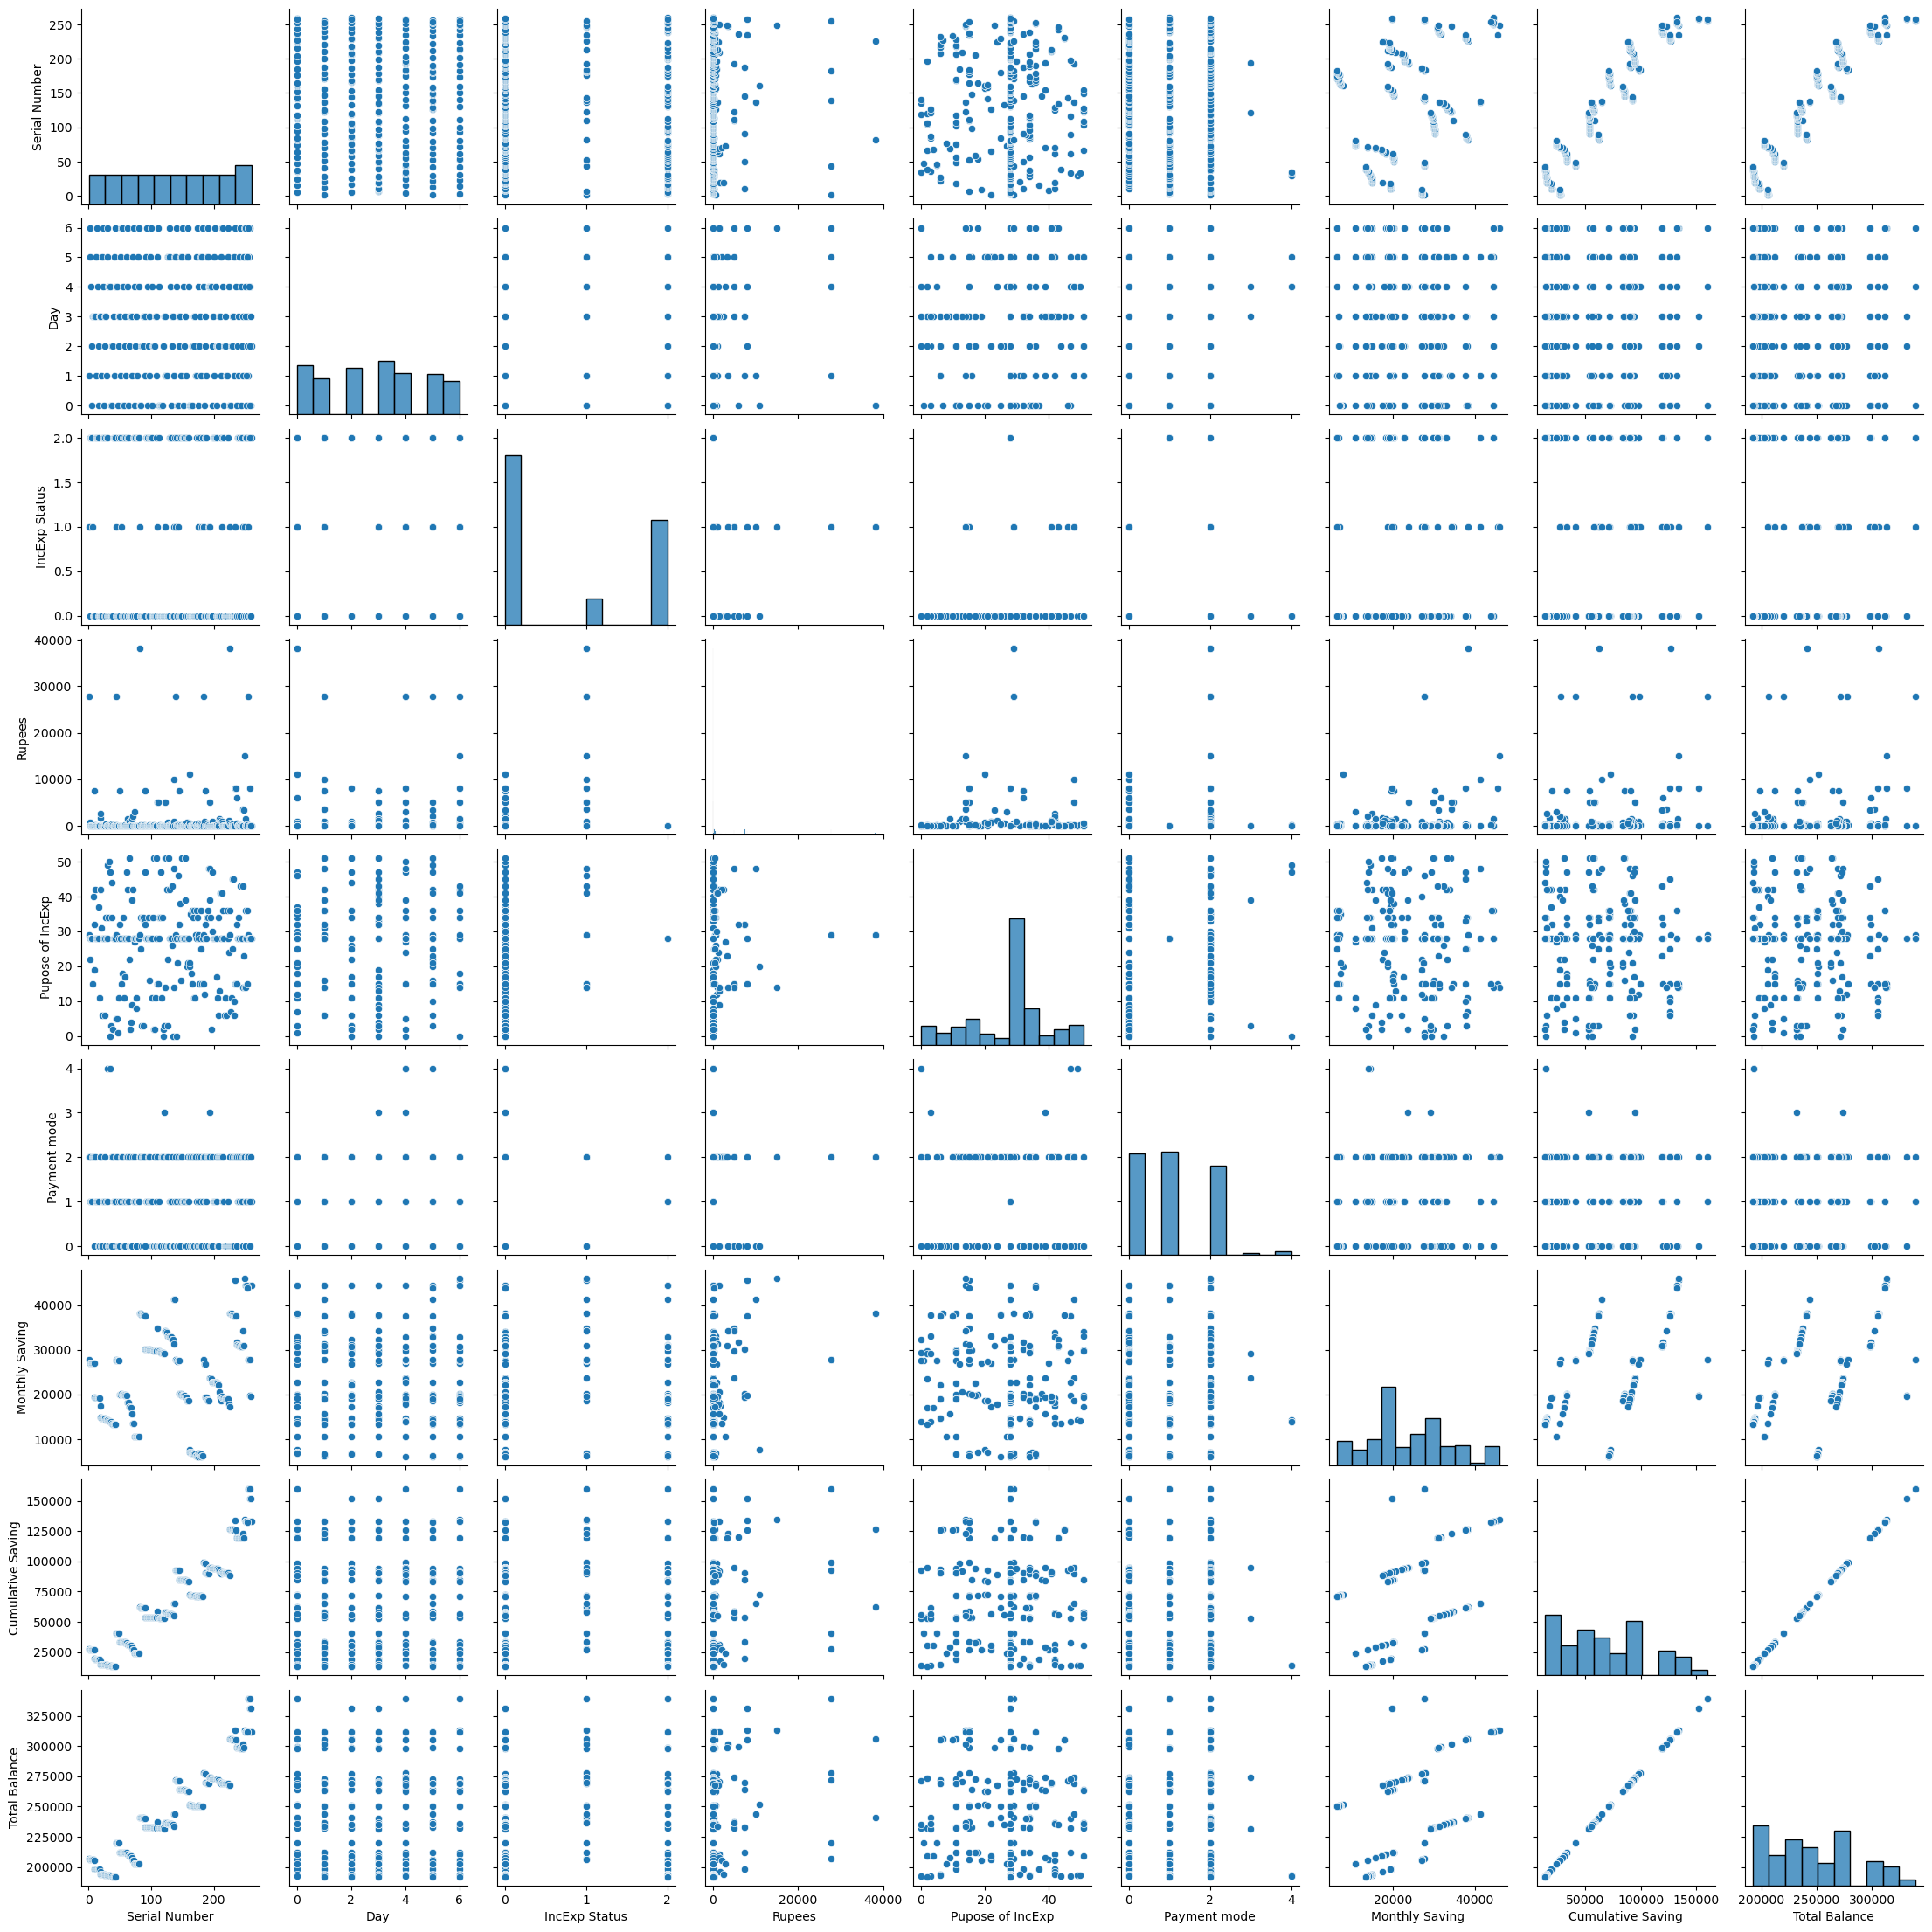

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data)
plt.show()

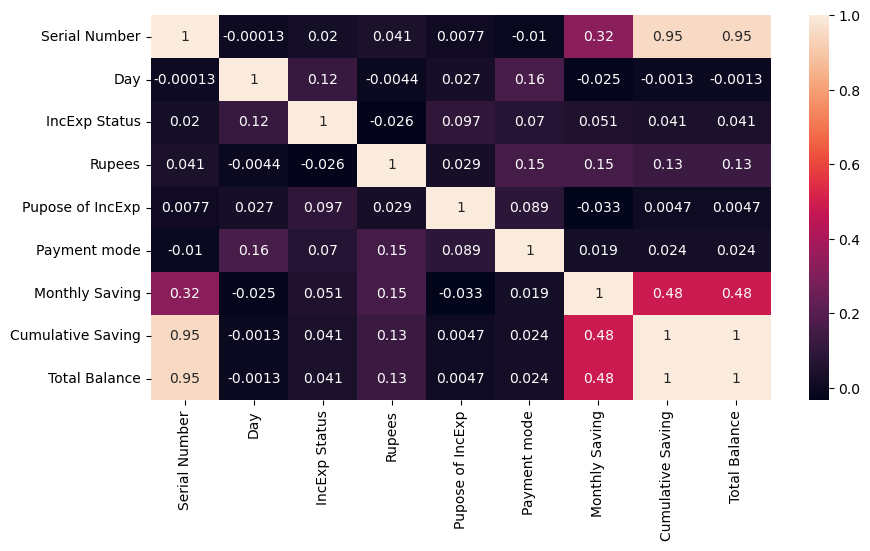

In [12]:
plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [13]:
data

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
Date,,,,,,,,,
31-07-2023,1,1,1,27700.0,29,2,27700.0,27700.00,206620.21
01-08-2023,2,5,0,720.9,22,2,26979.1,26979.10,205899.31
02-08-2023,3,6,2,0.0,28,1,26979.1,26979.10,205899.31
03-08-2023,4,4,2,0.0,28,1,26979.1,26979.10,205899.31
04-08-2023,5,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...
31-01-2024,255,6,1,27700.0,29,2,27700.0,160080.37,339000.58
01-02-2024,256,4,2,0.0,28,1,27700.0,160080.37,339000.58
02-02-2024,257,0,2,0.0,28,1,27700.0,160080.37,339000.58


In [14]:
x=data.iloc[:,:-2]
y=data.iloc[:,-1]
x

,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving
Date,,,,,,,
31-07-2023,1,1,1,27700.0,29,2,27700.0
01-08-2023,2,5,0,720.9,22,2,26979.1
02-08-2023,3,6,2,0.0,28,1,26979.1
03-08-2023,4,4,2,0.0,28,1,26979.1
04-08-2023,5,0,2,0.0,28,1,26979.1
...,...,...,...,...,...,...,...
31-01-2024,255,6,1,27700.0,29,2,27700.0
01-02-2024,256,4,2,0.0,28,1,27700.0
02-02-2024,257,0,2,0.0,28,1,27700.0


In [15]:
y

Date
31-07-2023    206620.21
01-08-2023    205899.31
02-08-2023    205899.31
03-08-2023    205899.31
04-08-2023    205899.31
                ...    
31-01-2024    339000.58
01-02-2024    339000.58
02-02-2024    339000.58
03-02-2024    331000.58
04-02-2024    330920.58
Name: Total Balance, Length: 269, dtype: float64

# 4. Model Building

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

# 5. Model Evaluation

In [19]:
print(model_lr.score(x_train,y_train))
print(model_lr.score(x_test,y_test))

0.9470322124616013
0.92358476620631


# 6. MOdel Predicdtion

In [20]:
y_pred=model_lr.predict(x_test)
y_pred

array([195865.64069665, 244019.00405289, 214359.05498076, 248494.19420582,
       265959.44299029, 260796.34056298, 275595.25750925, 212668.0856068 ,
       249836.08403286, 297122.3482569 , 255061.44634162, 298389.27869657,
       278611.27574747, 235015.7970444 , 267414.95954518, 271118.6948576 ,
       298623.3323126 , 301987.6669022 , 237208.77242814, 212784.69531735,
       311784.36967367, 271855.50101002, 210463.65546341, 200275.91731643,
       255219.2164984 , 191253.3594663 , 192717.21903635, 273987.82135237,
       247321.18457813, 193061.88890572, 239983.973691  , 212177.77080806,
       253509.60217368, 278038.42351645, 271113.14512859, 195416.5634233 ,
       247218.68245203, 212339.05241418, 243223.24418855, 245261.15104404,
       193664.47674715, 250973.34627348, 246439.55162894, 192559.59143837,
       213067.82871654, 277013.8857237 , 233466.89015505, 250811.95729056,
       233960.49290851, 314711.72584345, 190413.06136846, 251271.09260344,
       279228.2607402 , 2

In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

7232.225781522015
105868570.62036332
10289.245386342154
0.92358476620631


# 7. Result Visualization

In [22]:
data.reset_index(inplace=True)
data

,Date,Serial Number,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,31-07-2023,1,1,1,27700.0,29,2,27700.0,27700.00,206620.21
1,01-08-2023,2,5,0,720.9,22,2,26979.1,26979.10,205899.31
2,02-08-2023,3,6,2,0.0,28,1,26979.1,26979.10,205899.31
3,03-08-2023,4,4,2,0.0,28,1,26979.1,26979.10,205899.31
4,04-08-2023,5,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,31-01-2024,255,6,1,27700.0,29,2,27700.0,160080.37,339000.58
265,01-02-2024,256,4,2,0.0,28,1,27700.0,160080.37,339000.58
266,02-02-2024,257,0,2,0.0,28,1,27700.0,160080.37,339000.58
267,03-02-2024,258,2,0,8000.0,28,0,19700.0,152080.37,331000.58


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


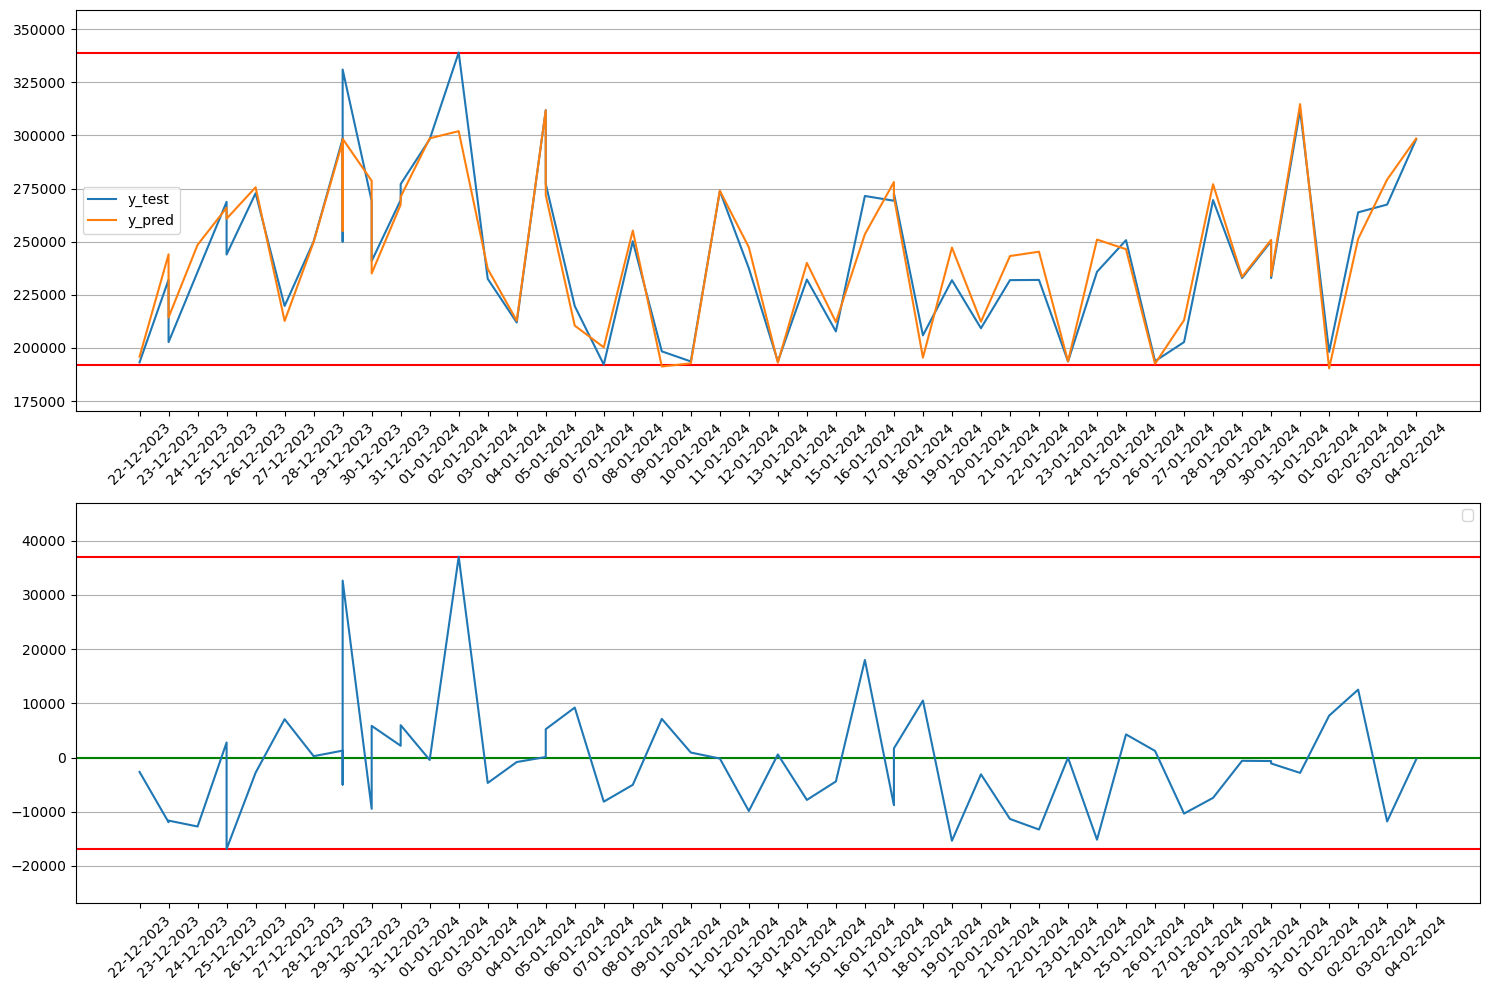

In [23]:
plt.figure(figsize=[15,10])

plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.axhline(min(y_test),c="r")
plt.axhline(max(y_test),c="r")
plt.ylim(min(min(y_test),min(y_pred))-20000,max(max(y_test),max(y_pred))+20000)
plt.grid(axis='y')
plt.plot(data["Date"].iloc[len(data["Date"])-len(x_test):],y_test,label="y_test")
plt.plot(data["Date"].iloc[len(data["Date"])-len(x_test):],y_pred,label="y_pred")
plt.legend()

plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(min(y_test-y_pred),c="r")
plt.axhline(0,color="green")
plt.axhline(max(y_test-y_pred),c="r")
plt.ylim(min(y_test-y_pred)-10000,max(y_test-y_pred)+10000)
plt.plot(data["Date"].iloc[len(data["Date"])-len(x_test):],y_test-y_pred)
plt.legend()

plt.tight_layout()
plt.show()